# A Discrimination Experiment: Competing MCs


A nice feature of MCs is the ability to superpose them without much interference. Indeed, summing two gratings generates intereference patterns (Moiré or plaids) which are interfering with the sensory processes that we study. On the contrary, MotionClouds are defined as uncoherent textures and interefrences are just happening "by chance".

In [3]:
%%writefile ../files/experiment_competing.py
#!/usr/bin/env python
"""

Superposition of MotionClouds to generate competing motions.

(c) Laurent Perrinet - INT/CNRS

"""
import numpy
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

name = 'competing'
z = (.5*mc.envelope_gabor(fx, fy, ft, sf_0=0.2, V_X=-1.5)
     + .1*mc.envelope_gabor(fx, fy, ft, sf_0=0.4, V_X=.5)#, theta=numpy.pi/2.)
    )
mc.figures(z, name)
mc.in_show_video(name)

name = 'two_bands'
# and now selecting blobs:
# one band
one = mc.envelope_gabor(fx, fy, ft, B_theta=10.)
# a second band
two = mc.envelope_gabor(fx, fy, ft, sf_0=.45, B_theta=10.)
mc.figures(one + two, name)
mc.in_show_video(name)

# explore parameters
for sf_0 in [0.0, 0.1 , 0.2, 0.3, 0.8, 0.9]:
    name_ = name + '-sf_0' + str(sf_0).replace('.', '_')
    one = mc.envelope_gabor(fx, fy, ft, B_theta=10.)
    two = mc.envelope_gabor(fx, fy, ft, sf_0=sf_0, B_theta=10.)
    mc.figures(one + two, name_)
    mc.in_show_video(name_)

name = 'counterphase_grating'
right = mc.envelope_speed(fx, fy, ft, V_X=.5 )
left = mc.envelope_speed(fx, fy, ft, V_X=-.5 )
grating = mc.envelope_gabor(fx, fy, ft)
z = grating * (left + right ) # thanks to the addititivity of MCs
mc.figures(z, name)
mc.in_show_video(name)

name = 'plaid'
diag1 = mc.envelope_gabor(fx, fy, ft, theta=numpy.pi/4.)
diag2 = mc.envelope_gabor(fx, fy, ft, theta=-numpy.pi/4.)
z = (diag1 + diag2)
mc.figures(z, name)
mc.in_show_video(name)

# explore parameters
for V_X in [0., 0.5, 1.]:
    name_ = name + '-V_X' + str(V_X).replace('.', '_')
    diag = mc.envelope_gabor(fx, fy, ft, V_X=V_X)
    z = (diag + diag2)
    mc.figures(z, name_)
    mc.in_show_video(name_)

for V_Y in [0., 0.5, 1.]:
    name_ = name + '-V_Y' + str(V_Y).replace('.', '_')
    diag = mc.envelope_gabor(fx, fy, ft, V_Y=V_Y)
    z = (diag + diag2)
    mc.figures(z, name_)
    mc.in_show_video(name_)

for div in [1, 2, 3, 5, 8, 13 ]:
    name_ = name + '-theta_pi-over-' + str(div).replace('.', '_')
    z = (mc.envelope_gabor(fx, fy, ft, theta=numpy.pi/div) + mc.envelope_gabor(fx, fy, ft, theta=-numpy.pi/div))
    mc.figures(z, name_)
    mc.in_show_video(name)


Overwriting ../files/experiment_competing.py


In [4]:
%cd ../files
%run experiment_competing.py
%cd ../posts

/Users/lolo/pool/blog/motionclouds.invibe.net/files


AttributeError: module 'vispy.visuals.transforms' has no attribute 'MatrixTransform'

/Users/lolo/pool/blog/motionclouds.invibe.net/posts


## a psychophysics experiment with counter-phase Motion Clouds

It is easy to run a psychophysics experiment using the [PsychoPy](http://www.psychopy.org/) library. We show below a simplistic script to show a MC and then exit:

In [3]:
%%writefile ../files/psychopy_simple.py
#!/usr/bin/env python
"""

A basic presentation in psychopy

(c) Laurent Perrinet - INT/CNRS


"""
# width and height of your screen
w, h = 1920, 1200
w, h = 2560, 1440

# width and height of the stimulus
w_stim, h_stim = 1024, 1024

loops = 1

import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
env = (mc.envelope_gabor(fx, fy, ft, V_X=1.) + mc.envelope_gabor(fx, fy, ft, V_X=-1.))
z = 2*mc.rectif(mc.random_cloud(env), contrast=.5) -1.

#from pyglet.gl import gl_info
from psychopy import visual, core, event, logging
logging.console.setLevel(logging.DEBUG)

win = visual.Window([w, h], fullscr=True)
stim = visual.GratingStim(win, 
        size=(w_stim, h_stim), units='pix',
        interpolate=True,
        mask='gauss',
        autoLog=False)#this stim changes too much for autologging to be useful

for i_frame in range(mc.N_frame * loops):
    #creating a new stimulus every time
    stim.setTex(z[:, :, i_frame % mc.N_frame])
    stim.draw()
    win.flip()

win.close()


Overwriting ../files/psychopy_simple.py


In [4]:
%cd ../files
!python2 psychopy_simple.py
%cd ../posts

/Users/laurentperrinet/pool/blog/motionclouds.invibe.net/files
2016-11-21 09:47:00.825 Python[21683:1704885] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/org.python.python.savedState
2.1400 	WARNING 	Monitor specification not found. Creating a temporary one...
2.1416 	WARNING 	User requested fullscreen with size [2560 1440], but screen is actually [1440, 900]. Using actual size
4.3594 	EXP 	Created window1 = Window(allowGUI=True, allowStencil=False, autoLog=True, bitsMode=UNKNOWN, blendMode='avg', color=array([ 0.,  0.,  0.]), colorSpace='rgb', fullscr=UNKNOWN, gamma=None, lms=UNKNOWN, monitor=<psychopy.monitors.calibTools.Monitor object at 0x1095205d0>, name='window1', pos=[0, 0], screen=0, size=array([1440,  900]), stereo=False, units=u'norm', useFBO=False, useRetina=False, viewOri=0.0, viewPos=None, viewScale=None, waitBlanking=True, winType='pyglet')
8.7605 	EXP 	window1: mouseVisible 

We may now test what motion is detected when superposing 2 MCs:

In [5]:
%%writefile ../files/psychopy_competing.py
#!/usr/bin/env python
"""

Using psychopy to perform an experiment on competing clouds

(c) Laurent Perrinet - INT/CNRS

 See http://www.motionclouds.invibe.net/posts/instructions-for-psychophysicists.html for a small tutorial

"""
# width and height of your screen
w, h = 1920, 1200
w, h = 2560, 1440 # iMac 27''

# width and height of the stimulus
w_stim, h_stim = 1024, 1024

print('launching experiment')
from psychopy import visual, core, event, logging, misc
logging.console.setLevel(logging.DEBUG)

import os, numpy
import MotionClouds as mc
import time, datetime
experiment = 'competing_v2_'
print('launching experiment')
logging.console.setLevel(logging.DEBUG)

#if no file use some defaults
info = {}
info['observer'] = 'anonymous'
info['screen_width'] = w
info['screen_height'] = h
info['nTrials'] = 5
info['N_X'] = mc.N_X # size of image
info['N_Y'] = mc.N_Y # size of image
info['N_frame_total'] = 64 # a full period. in time frames
info['N_frame'] = 64 # length of the presented period. in time frames
info['timeStr'] = datetime.datetime.now().date().isoformat() + time.strftime("_%H%M", time.localtime())
fileName = 'data/' + experiment + info['observer'] + '_' + info['timeStr'] + '.pickle'

print('generating data')
fx, fy, ft = mc.get_grids(info['N_X'], info['N_Y'], info['N_frame_total'])
up = 2*mc.rectif(mc.random_cloud(mc.envelope_gabor(fx, fy, ft, V_X=+.5))) - 1
down = 2*mc.rectif(mc.random_cloud(mc.envelope_gabor(fx, fy, ft, V_X=-.5))) - 1

print('go!      ')
win = visual.Window([info['screen_width'], info['screen_height']], fullscr=True)

stim = visual.GratingStim(win,
        size=(info['screen_height'], info['screen_height']), units='pix',
        interpolate=True,
        mask = 'gauss',
        autoLog=False)#this stim changes too much for autologging to be useful

wait_for_response = visual.TextStim(win,
                        text = u"?", units='norm', height=0.15, color='DarkSlateBlue',
                        pos=[0., -0.], alignHoriz='center', alignVert='center' )
wait_for_next = visual.TextStim(win,
                        text = u"+", units='norm', height=0.15, color='BlanchedAlmond',
                        pos=[0., -0.], alignHoriz='center', alignVert='center' )

def getResponse():
    event.clearEvents()#clear the event buffer to start with
    resp = None#initially
    while 1:#forever until we return a keypress
        for key in event.getKeys():
            #quit
            if key in ['escape', 'q']:
                win.close()
                core.quit()
                return None
            #valid response - check to see if correct
            elif key in ['down', 'up']:
                if key in ['down'] :return -1
                else: return 1
            else:
                print( "hit DOWN or UP (or Esc) (You hit %s)" %key)

clock = core.Clock()
FPS = 50.
def presentStimulus(C_A, C_B):
    """Present stimulus
    """
    phase_up = numpy.floor(numpy.random.rand() *(info['N_frame_total']-info['N_frame']))
    phase_down = numpy.floor(numpy.random.rand() *(info['N_frame_total']-info['N_frame']))
    clock.reset()
    for i_frame in range(info['N_frame']): # length of the stimulus
        stim.setTex(C_A * up[:, :, i_frame+phase_up]+C_B * down[:, :, i_frame+phase_down])
        stim.draw()
#        while clock.getTime() < i_frame/FPS:
#            print clock.getTime(), i_frame/FPS
#            print('waiting')
        win.flip()

results = numpy.zeros((2, info['nTrials']))
for i_trial in range(info['nTrials']):
    wait_for_next.draw()
    win.flip()
    core.wait(0.5)
    C_A = numpy.random.rand() # a random number between 0 and 1
    presentStimulus(C_A, 1. - C_A)
    wait_for_response.draw()
    win.flip()
    ans = getResponse()
    results[0, i_trial] = ans
    results[1, i_trial] = C_A

win.update()
core.wait(0.5)

win.close()

#save data
fileName = 'data/' + experiment + info['observer'] + '_' + info['timeStr'] + '.npy'
numpy.save(fileName, results)
misc.toFile(fileName.replace('npy', 'pickle'), info)


core.quit() # quit

Overwriting ../files/psychopy_competing.py


In [6]:
%cd ../files
!python2 psychopy_competing.py
%cd ../posts

/Users/laurentperrinet/pool/blog/motionclouds.invibe.net/files
launching experiment
2016-11-21 09:47:25.929 Python[21721:1705469] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/org.python.python.savedState
launching experiment
generating data
go!      
psychopy_competing.py:89: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  stim.setTex(C_A * up[:, :, i_frame+phase_up]+C_B * down[:, :, i_frame+phase_down])
44.2654 	WARNING 	Monitor specification not found. Creating a temporary one...
44.2670 	WARNING 	User requested fullscreen with size [2560 1440], but screen is actually [1440, 900]. Using actual size
62.4625 	EXP 	Created window1 = Window(allowGUI=True, allowStencil=False, autoLog=True, bitsMode=UNKNOWN, blendMode='avg', color=array([ 0.,  0.,  0.]), colorSpace='rgb', fullscr=UNKNOWN, gamma=None, lms=UNKNOWN, monitor=<psyc

## Analysis of the Discrimination Experiment

In the ``psychopy_competition.py`` script, we implemented an experiment to test whether one could discriminate the dominating motion in a sum of two motion clouds in opposite directions.

Herein, we analyse the data that was collected over different sessions and try to draw some conclusions.

In [7]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## Analysis, version 1

In a first version of the experiment, we only stored the results in a numpy file:

In [8]:
!ls ../files/data/competing_v1_*npy

../files/data/competing_v1_bruno_Dec_14_1210.npy
../files/data/competing_v1_lup_Dec_12_1003.npy
../files/data/competing_v1_lup_Dec_12_1013.npy
../files/data/competing_v1_lup_Dec_14_1201.npy
../files/data/competing_v1_meduz_Dec_14_1204.npy


experiment  ../files/data/competing_v1_bruno_Dec_14_1210.npy , # trials= 50
experiment  ../files/data/competing_v1_lup_Dec_12_1003.npy , # trials= 50
experiment  ../files/data/competing_v1_lup_Dec_12_1013.npy , # trials= 50
experiment  ../files/data/competing_v1_lup_Dec_14_1201.npy , # trials= 10
experiment  ../files/data/competing_v1_meduz_Dec_14_1204.npy , # trials= 50


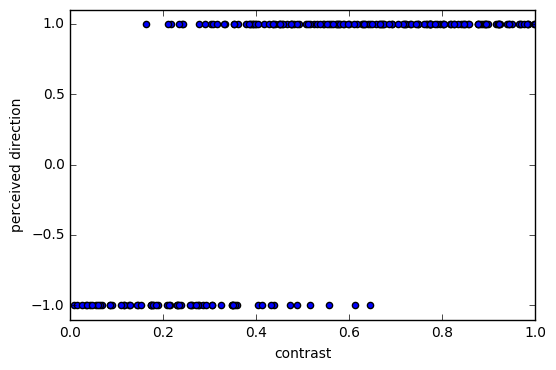

In [9]:
import glob
fig = plt.figure()
ax = fig.add_subplot(111)
for fn in glob.glob('../files/data/competing_v1_*npy'):
    results = np.load(fn)
    print ('experiment ', fn, ', # trials=', results.shape[1])
    ax.scatter(results[1, :], results[0, :])
_ = ax.axis([0., 1., -1.1, 1.1])
_ = ax.set_xlabel('contrast')
_ = ax.set_ylabel('perceived direction')

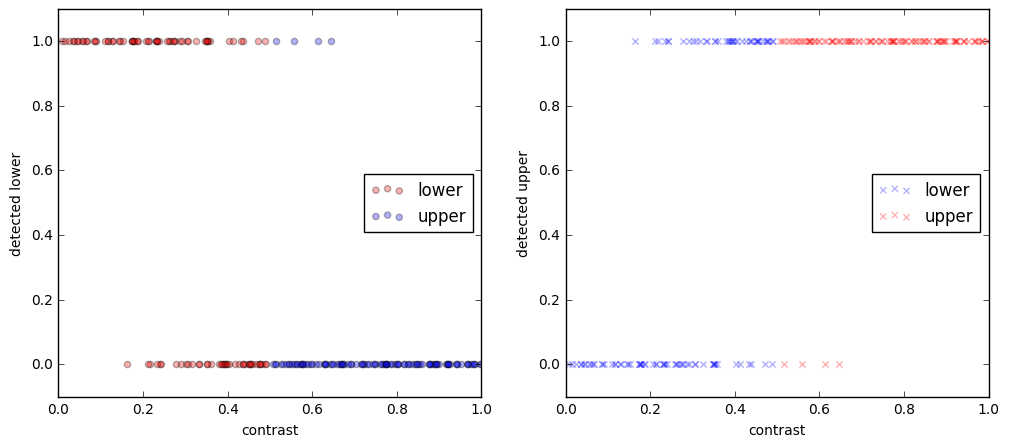

In [10]:
alpha = .3
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
data = []
for fn in glob.glob('../files/data/competing_v1_*npy'):
    results = np.load(fn)
    data_ = np.empty(results.shape)
    # lower stronger, detected lower = CORRECT is 1
    ax1.scatter(results[1, results[1, :]<.5], 
                1.*(results[0, results[1, :]<.5]==-1), 
                c='r', alpha=alpha)
    # copying data: contrast (from .5 to 1), correct 
    data_[0, results[1, :]<.5] = 1. - results[1, results[1, :]<.5]
    data_[1, results[1, :]<.5] = 1.*(results[0, results[1, :]<.5]==-1)
    # upper stronger, detected lower = INCORRECT is 1
    ax1.scatter(results[1, results[1, :]>.5], 
                1.*(results[0, results[1, :]>.5]==-1), 
                c='b', alpha=alpha)
    # lower stronger, detected upper = INCORRECT is 1
    ax2.scatter(results[1, results[1, :]<.5], 
                1.*(results[0, results[1, :]<.5]==1), 
                c='b', alpha=alpha, marker='x')
    # upper stronger, detected upper = CORRECT is 1
    ax2.scatter(results[1, results[1, :]>.5], 
                1.*(results[0, results[1, :]>.5]==1), 
                c='r', alpha=alpha, marker='x')
    # copying data: contrast (from .5 to 1), correct 
    data_[0, results[1, :]>=.5] = results[1, results[1, :]>=.5]
    data_[1, results[1, :]>=.5] = 1.*(results[0, results[1, :]>=.5]==1)
    data.append(data_)

for ax in [ax1, ax2]:
    ax.axis([0., 1., -.1, 1.1])
    _ = ax.set_xlabel('contrast')
_ = ax1.set_ylabel('detected lower')
_ = ax1.legend(['lower', 'upper'], loc='right')
_ = ax2.set_ylabel('detected upper')
_ = ax2.legend(['lower', 'upper'], loc='right')

(note the subplots are equivalent up to a flip)

One could not fit psychometric curves for this 2AFC. See for instance https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3110332/

## TODO: look at http://nbviewer.ipython.org/github/arokem/teach_optimization/blob/master/optimization.ipynb

let's explore another way:

In [11]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
 
def sigmoid(c, c0, k):
    y = 1 / (1 + np.exp(-k*(c-c0)))
    return y
 

In [12]:
!ls ../files/data/competing_v2_*

../files/data/competing_v2_anonymous_2015-07-01.npy
../files/data/competing_v2_anonymous_2015-07-01.pickle
../files/data/competing_v2_anonymous_2015-07-01_1344.npy
../files/data/competing_v2_anonymous_2015-07-01_1344.pickle
../files/data/competing_v2_jean_Sep_03_1536.npy
../files/data/competing_v2_jean_Sep_03_1536.pickle
../files/data/competing_v2_laurent_Sep_17_1522.npy
../files/data/competing_v2_laurent_Sep_17_1522.pickle


[ 0.291  6.067]
[  0.345  13.492]
[  0.287  39.2  ]
[   0.637  160.796]
[  0.362  13.633]


/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


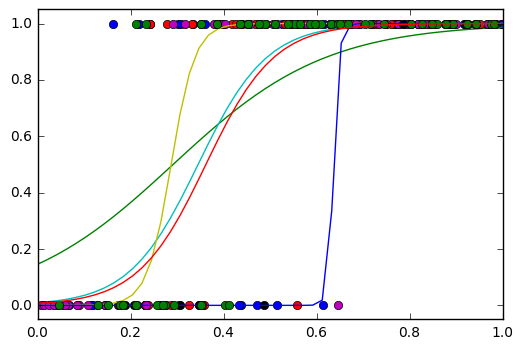

In [13]:
for fn in glob.glob('../files/data/competing_v1_*npy'):
    results = np.load(fn)
    cdata, ydata = results[1, :], .5*results[0, : ]+.5
    pylab.plot(cdata, ydata, 'o')

    popt, pcov = curve_fit(sigmoid, cdata, ydata)
    print (popt)
    c = np.linspace(0, 1, 50)
    y = sigmoid(c, *popt)
    pylab.plot(c, y)
    
pylab.ylim(-.05, 1.05)
pylab.legend(loc='best')

## Analysis, version 2

In the second version, we also stored some information about the experiment

{'nTrials': 5, 'N_frame_total': 64, 'timeStr': '2015-07-01', 'N_Y': 256, 'N_X': 256, 'N_frame': 64, 'screen_width': 2560, 'screen_height': 1440, 'observer': 'anonymous'}
{'nTrials': 5, 'N_frame_total': 64, 'timeStr': '2015-07-01_1344', 'N_Y': 256, 'N_X': 256, 'N_frame': 64, 'screen_width': 2560, 'screen_height': 1440, 'observer': 'anonymous'}
{'nTrials': 50, 'N_frame_total': 128, 'timeStr': 'Sep_03_1536', 'N_Y': 128, 'N_X': 128, 'N_frame': 128, 'screen_width': 2560, 'screen_height': 1440, 'observer': 'jean'}
{'nTrials': 50, 'N_frame_total': 128, 'timeStr': 'Sep_17_1522', 'N_Y': 128, 'N_X': 128, 'N_frame': 128, 'screen_width': 2560, 'screen_height': 1440, 'observer': 'laurent'}


/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


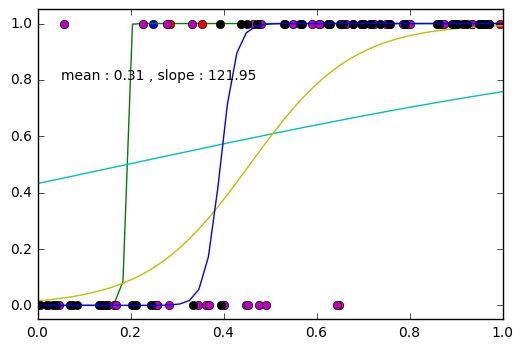

In [17]:
import pickle
#from psychopy import misc
mean, slope = [], []
for fn in glob.glob('../files/data/competing_v2_*npy'):
    results = np.load(fn)
    #data = misc.fromFile(fn.replace('npy', 'pickle'))
    with open(fn.replace('npy', 'pickle'), 'rb') as f: data = pickle.load(f)
    print (data)
    cdata, ydata = results[1, :], .5*results[0, : ]+.5
    pylab.plot(cdata, ydata, 'o')

    popt, pcov = curve_fit(sigmoid, cdata, ydata)
    mean.append(popt[0])
    slope.append(popt[1])
    c = np.linspace(0, 1, 50)
    y = sigmoid(c, *popt)
    pylab.plot(c, y)

pylab.text(0.05, 0.8, 'mean : %0.2f , slope : %0.2f ' %(np.mean(mean), np.mean(slope)))
pylab.ylim(-.05, 1.05)
pylab.legend(loc='best')